In [120]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import os
from scipy import stats

In [121]:
#read input file
nfl_file_path = Path("team_stats_2003_2023.csv")
nfl_data = pd.read_csv(nfl_file_path)
# nfl_data

In [122]:
#clean data to account for team name changes

for row, team in enumerate(nfl_data["team"]):
    if team == "Oakland Raiders":
        nfl_data.loc[row, "team"] = "Las Vegas Raiders" 
    elif team == "St. Louis Rams":
        nfl_data.loc[row, "team"] = "Los Angeles Rams"
    elif team == "Washington Redskins":    
        nfl_data.loc[row, "team"] = "Washington Commanders"
    elif team == "Washington Football Team":
        nfl_data.loc[row, "team"] = "Washington Commanders"
    elif team == "San Diego Chargers":
        nfl_data.loc[row, "team"] = "Los Angeles Chargers"

In [123]:
afc_east = ["New England Patriots",
            "Miami Dolphins",
             "Buffalo Bills",
              "New York Jets"]
afc_west = ["Kansas City Chiefs",
            "Las Vegas Raiders",
            "Denver Broncos",
            "Los Angeles Chargers"]
afc_north = ["Baltimore Ravens",
             "Cleveland Browns",
             "Pittsburgh Steelers",
             "Cincinnatti Bengals"]
afc_south = ["Houston Texans",
             "Jacksonville Jaguars",
             "Indianapolis Colts",
             "Tennessee Titans"]
nfc_east = ["Dallas Cowboys",
            "Philadelphia Eagles",
            "New York Giants",
            "Washington Commanders"]
nfc_west = ["San Francisco 49ers",
            "Los Angeles Rams",
            "Seattle Seahawks",
            "Arizona Cardinals"]
nfc_north = ["Detroit Lions",
             "Green Bay Packers",
             "Minnesota Vikings",
             "Chicago Bears"]
nfc_south = ["Tampa Bay Buccaneers",
             "New Orleans Saints",
             "Atlanta Falcons",
             "Carolina Panthers"]
#put these lists into a dictionary
divisions_dict = {"AFC East" : afc_east,
                  "AFC West" : afc_west,
                  "AFC North" : afc_north,
                  "AFC South" : afc_south,
                  "NFC East" : nfc_east,
                  "NFC West" : nfc_west,
                  "NFC North" : nfc_north,
                  "NFC South" : nfc_south}


In [124]:
print(divisions_dict)

{'AFC East': ['New England Patriots', 'Miami Dolphins', 'Buffalo Bills', 'New York Jets'], 'AFC West': ['Kansas City Chiefs', 'Las Vegas Raiders', 'Denver Broncos', 'Los Angeles Chargers'], 'AFC North': ['Baltimore Ravens', 'Cleveland Browns', 'Pittsburgh Steelers', 'Cincinnatti Bengals'], 'AFC South': ['Houston Texans', 'Jacksonville Jaguars', 'Indianapolis Colts', 'Tennessee Titans'], 'NFC East': ['Dallas Cowboys', 'Philadelphia Eagles', 'New York Giants', 'Washington Commanders'], 'NFC West': ['San Francisco 49ers', 'Los Angeles Rams', 'Seattle Seahawks', 'Arizona Cardinals'], 'NFC North': ['Detroit Lions', 'Green Bay Packers', 'Minnesota Vikings', 'Chicago Bears'], 'NFC South': ['Tampa Bay Buccaneers', 'New Orleans Saints', 'Atlanta Falcons', 'Carolina Panthers']}


In [125]:
#extract only necessary columns

nfl_data_penalties = nfl_data[['penalties', 'team', 'year','wins','losses']]
nfl_data_penalties


,penalties,team,year,wins,losses
0,111,New England Patriots,2003,14,2
1,103,Miami Dolphins,2003,10,6
2,106,Buffalo Bills,2003,6,10
3,69,New York Jets,2003,6,10
4,126,Baltimore Ravens,2003,10,6
...,...,...,...,...,...
667,103,Carolina Panthers,2023,2,15
668,101,San Francisco 49ers,2023,12,5
669,89,Los Angeles Rams,2023,10,7
670,111,Seattle Seahawks,2023,9,8


In [126]:
#clean and aggregate data

nfl_data_penalties_teams = nfl_data_penalties.groupby(['team']).sum()
nfl_data_penalties_teams['total_games'] = nfl_data_penalties_teams.wins + nfl_data_penalties_teams.losses
nfl_data_penalties_teams['agg_win_pct'] = nfl_data_penalties_teams.wins/nfl_data_penalties_teams.total_games
nfl_data_penalties_teams = nfl_data_penalties_teams.drop(['total_games', 'wins', 'year', 'losses'], axis = 1)
nfl_data_penalties_teams['agg_win_pct'] = nfl_data_penalties_teams.agg_win_pct * 100
nfl_data_penalties_teams.count()
# nfl_data_penalties_teams

penalties      32
agg_win_pct    32
dtype: int64

In [129]:
wins = nfl_data_penalties_teams['agg_win_pct']
penalties = nfl_data_penalties_teams['penalties']
#run the correlation between the variables
correlation = stats.pearsonr(wins,penalties)
print(correlation)
#print the output

PearsonRResult(statistic=-0.4132865557182813, pvalue=0.018718457373492627)


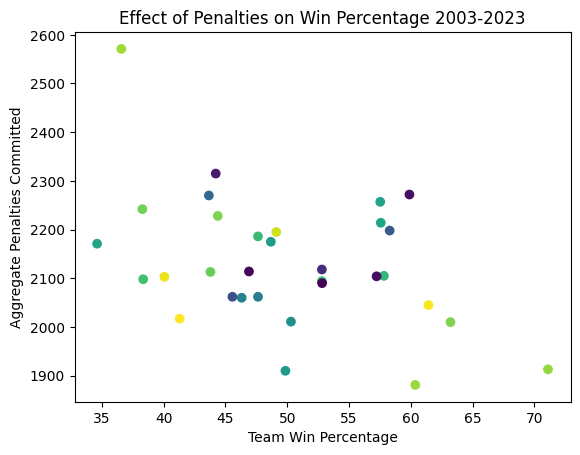

In [118]:
colors = np.random.rand(32)
plt.scatter(nfl_data_penalties_teams["agg_win_pct"], nfl_data_penalties_teams["penalties"], c = colors) 
plt.xlabel("Team Win Percentage")
plt.ylabel("Aggregate Penalties Committed")
plt.title("Effect of Penalties on Win Percentage 2003-2023")
plt.show() 


In [104]:
#clean/aggregate data for analyzing effect of penalties over the years
nfl_data_yr_brkdown_1 = nfl_data[nfl_data['year'] <= 2010]
nfl_data_yr_brkdown_1 = nfl_data_yr_brkdown_1[['penalties', 'team', 'year','wins','losses']]
# nfl_data_yr_brkdown_1

nfl_data_yr_brkdown_1 = nfl_data_yr_brkdown_1.groupby(['team']).sum()
nfl_data_yr_brkdown_1['total_games'] = nfl_data_yr_brkdown_1.wins + nfl_data_yr_brkdown_1.losses
nfl_data_yr_brkdown_1['agg_win_pct'] = nfl_data_yr_brkdown_1.wins/nfl_data_yr_brkdown_1.total_games
nfl_data_yr_brkdown_1 = nfl_data_yr_brkdown_1.drop(['total_games', 'wins', 'year', 'losses'], axis = 1)
nfl_data_yr_brkdown_1['agg_win_pct'] = nfl_data_yr_brkdown_1.agg_win_pct * 100
nfl_data_yr_brkdown_1.count()
# nfl_data_yr_brkdown_1


penalties      32
agg_win_pct    32
dtype: int64

In [130]:
wins_1 = nfl_data_yr_brkdown_1['agg_win_pct']
penalties_1 = nfl_data_yr_brkdown_1['penalties']
#run the correlation between the variables
correlation = stats.pearsonr(wins_1,penalties_1)
print(correlation)
#print the output

PearsonRResult(statistic=-0.4049254793876751, pvalue=0.02150887679245877)


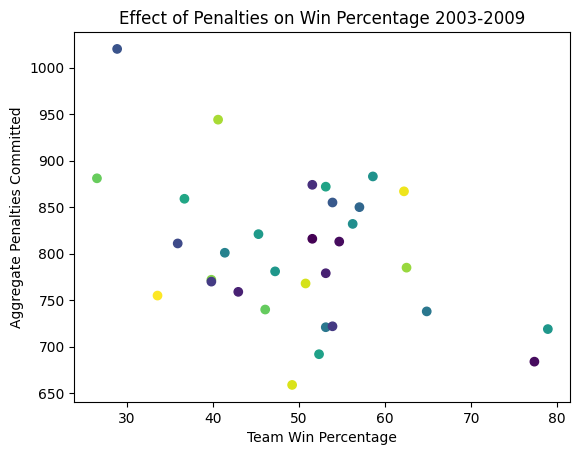

In [117]:
colors = np.random.rand(32)
plt.scatter(nfl_data_yr_brkdown_1["agg_win_pct"], nfl_data_yr_brkdown_1["penalties"], c = colors) 
plt.xlabel("Team Win Percentage")
plt.ylabel("Aggregate Penalties Committed")
plt.title("Effect of Penalties on Win Percentage 2003-2009")
plt.show() 


In [108]:
nfl_data_yr_brkdown_2 = nfl_data[nfl_data['year'] <= 2017]
nfl_data_yr_brkdown_2 = nfl_data_yr_brkdown_2[nfl_data_yr_brkdown_2['year'] > 2010]

# nfl_data_yr_brkdown_2

nfl_data_yr_brkdown_2 = nfl_data_yr_brkdown_2[['penalties', 'team', 'year','wins','losses']]
# nfl_data_yr_brkdown_1

nfl_data_yr_brkdown_2 = nfl_data_yr_brkdown_2.groupby(['team']).sum()
nfl_data_yr_brkdown_2['total_games'] = nfl_data_yr_brkdown_2.wins + nfl_data_yr_brkdown_2.losses
nfl_data_yr_brkdown_2['agg_win_pct'] = nfl_data_yr_brkdown_2.wins/nfl_data_yr_brkdown_2.total_games
nfl_data_yr_brkdown_2 = nfl_data_yr_brkdown_2.drop(['total_games', 'wins', 'year', 'losses'], axis = 1)
nfl_data_yr_brkdown_2['agg_win_pct'] = nfl_data_yr_brkdown_2.agg_win_pct * 100
nfl_data_yr_brkdown_2.count()
# nfl_data_yr_brkdown_2


penalties      32
agg_win_pct    32
dtype: int64

In [131]:
wins_2 = nfl_data_yr_brkdown_2['agg_win_pct']
penalties_2 = nfl_data_yr_brkdown_2['penalties']
#run the correlation between the variables
correlation = stats.pearsonr(wins_2,penalties_2)
print(correlation)

PearsonRResult(statistic=-0.2291639152614548, pvalue=0.20707814409920317)


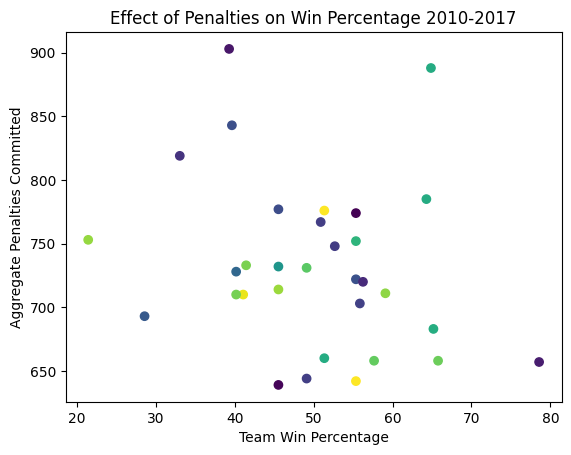

In [111]:
colors = np.random.rand(32)
plt.scatter(nfl_data_yr_brkdown_2["agg_win_pct"], nfl_data_yr_brkdown_2["penalties"], c = colors) 
plt.xlabel("Team Win Percentage")
plt.ylabel("Aggregate Penalties Committed")
plt.title("Effect of Penalties on Win Percentage 2010-2017")
plt.show() 

In [113]:
nfl_data_yr_brkdown_3 = nfl_data
nfl_data_yr_brkdown_3 = nfl_data_yr_brkdown_3[nfl_data_yr_brkdown_3['year'] > 2017]

nfl_data_yr_brkdown_3

nfl_data_yr_brkdown_3 = nfl_data_yr_brkdown_3[['penalties', 'team', 'year','wins','losses']]
# nfl_data_yr_brkdown_1

nfl_data_yr_brkdown_3 = nfl_data_yr_brkdown_3.groupby(['team']).sum()
nfl_data_yr_brkdown_3['total_games'] = nfl_data_yr_brkdown_3.wins + nfl_data_yr_brkdown_3.losses
nfl_data_yr_brkdown_3['agg_win_pct'] = nfl_data_yr_brkdown_3.wins/nfl_data_yr_brkdown_3.total_games
nfl_data_yr_brkdown_3 = nfl_data_yr_brkdown_3.drop(['total_games', 'wins', 'year', 'losses'], axis = 1)
nfl_data_yr_brkdown_3['agg_win_pct'] = nfl_data_yr_brkdown_3.agg_win_pct * 100
nfl_data_yr_brkdown_3.count()
# rslt_df = dataframe[dataframe['Percentage'] > 70] 


penalties      32
agg_win_pct    32
dtype: int64

In [132]:
wins_3 = nfl_data_yr_brkdown_3['agg_win_pct']
penalties_3 = nfl_data_yr_brkdown_3['penalties']
#run the correlation between the variables
correlation = stats.pearsonr(wins_3,penalties_3)
print(correlation)

PearsonRResult(statistic=0.03815879272569023, pvalue=0.8357397352344533)


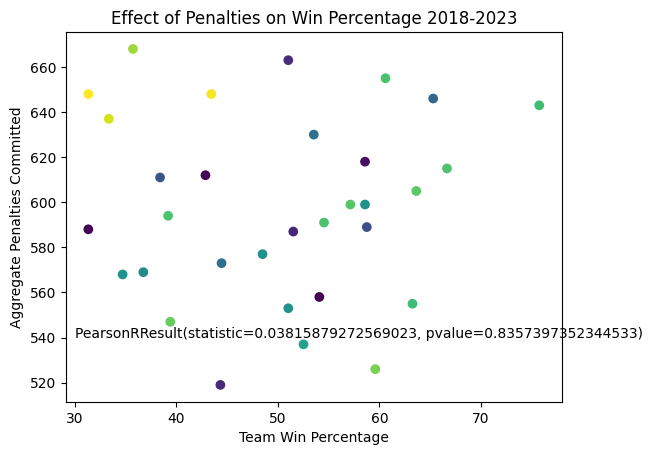

In [135]:
colors = np.random.rand(32)
plt.scatter(nfl_data_yr_brkdown_3["agg_win_pct"], nfl_data_yr_brkdown_3["penalties"], c = colors) 
plt.xlabel("Team Win Percentage")
plt.ylabel("Aggregate Penalties Committed")
plt.title("Effect of Penalties on Win Percentage 2018-2023")
plt.annotate(correlation, xy = (30,540))
plt.show() 
